# CheEMBL化合物数据采集 
## 网址
https://www.ebi.ac.uk/chembl/
## 简介
ChEMBL是由欧洲核生物研究组织（European Bioinformatics Institute, EBI）开发的化合物数据库，其包含了超过100万条化合物的结构、活性、活性指标、注释等信息。ChEMBL的目标是成为一个开放、公开、全面的化合物数据库，为全人类提供有效的化学信息。ChEMBL的开发始于2000年，目前已成为欧洲核生物研究组织（EBI）的重要组成部分。

ChEMBL的化合物数据采集主要包括以下几个方面：
1. 化合物结构采集：ChEMBL提供的化合物结构数据包括分子式、二维结构图、三维结构图、分子量等信息。
2. 化合物活性数据采集：ChEMBL提供的化合物活性数据包括分子活性数据、化学反应数据、化学反应物质数据等。
3. 化合物注释数据采集：ChEMBL提供的化合物注释数据包括化学家注释、结构注释、活性注释等。
4. 化合物相互作用数据采集：ChEMBL提供的化合物相互作用数据包括化合物相互作用数据、化合物相互作用网络数据等。
5. 化合物药物数据采集：ChEMBL提供的化合物药物数据包括药物结构、药物活性数据、药物相互作用数据等。

ChEMBL化合物数据采集的主要流程如下：
1. 注册ChEMBL账号：首先需要注册ChEMBL账号，注册地址为https://www.ebi.ac.uk/chembl/user_signup。
2. 选择化合物数据类型：选择需要采集的化合物数据类型，如化合物结构数据、化合物活性数据、化合物注释数据等。
3. 选择采集目标：选择需要采集的化合物数据目标，如特定分子、特定类型化合物、特定药物等。
4. 选择采集方式：选择采集方式，如API、Web界面、Excel文件等。
5. 采集数据：根据选择的采集方式，采集化合物数据。

ChEMBL化合物数据采集的优点有：
1. 全面性：ChEMBL提供的化合物数据覆盖了化学、生物、药物领域，涵盖了各个领域的最新研究成果。
2. 准确性：ChEMBL的化合物数据采集是基于结构、活性、注释等多方面信息，具有较高的准确性。
3. 开放性：ChEMBL的化合物数据采集是开放的，任何人都可以免费使用。

## 目标
本次项目的目标是利用ChEMBL数据库，采集化合物结构、活性、注释数据，并进行数据分析。
了解 ChEMBL 数据库以及如何从 ChEMBL 中提取数据，即感兴趣目标的（化合物、活性数据）对。这些数据集可用于许多化学信息学任务，例如相似性搜索、聚类或机器学习。

## 理论内容
1. 化学信息学基础
2. ChEMBL 数据库
    ChEMBL 网络服务
    ChEMBL 网络资源客户端
3. 化合物结构数据
4. 化合物活性数据
    复合活性测量
     IC50测量
     pIC50值
5. 化合物注释数据
6. 化合物相互作用数据
7. 化合物药物数据
8. 数据分析方法

## 实践内容
目标：获取具有给定目标的生物活性数据的化合物列表
- 连接到 ChEMBL 数据库
- 获取目标数据（MAP2K6:P52564）
    - 获取并下载目标数据
    - 选择目标 ChEMBL ID

- 获取生物活性数据
    - 获取并下载目标的生物活性数据
    - 预处理和过滤生物活性数据

- 获取化合物数据
    - 获取并下载化合物数据
    - 预处理和过滤化合物数据

- 输出生物活性化合物数据
    - 并生物活性和化合物数据，并添加 pIC50 值
    - 绘制具有最高 pIC50 的分子



####  pIC50 值

- 为了便于比较 IC50 值，IC50 值具有较大的值范围并以不同的单位（M、nM、...）给出，通常使用 pIC50 值
- pIC50 是转换为摩尔单位时 IC50 值的负对数： pIC50=−log10(IC50) ， 在哪里 IC50 以 M 为单位指定
- pIC50 值越高表明药物的效力呈指数级增长
- 请注意，转换可以适应相应的 IC50 单位，例如对于纳米： pIC50=−log10(IC50∗10−9)=9−log10(IC50)

 其他活动措施：
此外，IC50和pIC50，还使用其他生物活性测量，例如平衡常数[KI]和半最大有效浓度[EC50]

In [1]:
# 连接到 ChEMBL 数据库
# 首先，导入 ChEMBL Web 资源客户端以及其他 Python 库。

import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm


In [2]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data_MAP2K6'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)

/Users/wangyang/Desktop/AI-drug-design/list/01_Compound_data_acquisition/data_MAP2K6


In [3]:
# 接下来，我们创建用于 API 访问的资源对象。
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [4]:
# 查看类型
type(targets_api)

chembl_webresource_client.query_set.QuerySet

In [5]:
'''
获取目标数据（MAP2K6:P52564） 
从UniProt 网站获取感兴趣靶点的 UniProt ID（MAP2K6:P52564 ）https://www.uniprot.org/uniprotkb
使用UniProt ID获取目标信息
如果您对其他目标感兴趣，请选择不同的 UniProt ID。
'''

uniprot_id = "P52564"

## 从ChEMBL获取目标数据

In [6]:
# 从 ChEMBL 获取目标信息，但仅限于指定值
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'目标的类型是 "{type(targets)}"')

目标的类型是 "<class 'chembl_webresource_client.query_set.QuerySet'>"


## 从ChEMBL下载目标数据

查询结果存储在一个QuerySet（查询集）目标中，也就是说，在我们提出要求之前，查询结果不会从 ChEMBL 中获取（此处使用pandas.DataFrame.from_records）。


In [7]:
targets = pd.DataFrame.from_records(targets)
targets

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Dual specificity mitogen-activated protein kin...,CHEMBL2171,SINGLE PROTEIN
1,Homo sapiens,Dual specificity mitogen-activated protein kin...,CHEMBL2171,SINGLE PROTEIN


## 选择目标（目标 ChEMBL ID）

检查条目后，我们选择第一个条目作为关注目标：

In [8]:
target = targets.iloc[0]
target

organism                                                 Homo sapiens
pref_name           Dual specificity mitogen-activated protein kin...
target_chembl_id                                           CHEMBL2171
target_type                                            SINGLE PROTEIN
Name: 0, dtype: object

## 保存选定的 ChEMBL ID

In [9]:
chembl_id = target.target_chembl_id
print(f"目标 ChEMBL ID 为 {chembl_id}")

目标 ChEMBL ID 为 CHEMBL2171


## 获取生物活性数据

- 现在，我们要查询感兴趣目标的生物活性数据。

- 从ChEMBL中获取目标的生物活性数据

- 在这一步中，我们将获取生物活性数据，并对其进行筛选，以便只考虑

    - 人类蛋白质
    - 生物活性类型 IC50、
    -  精确测量（关系式"="）
    - 结合数据（化验类型"B"）

In [10]:
# 使用bioactivities_api接口过滤符合条件的生物活动数据
# 过滤条件：目标ID为chembl_id，类型为"IC50"，关系符为"="，实验类型为"B"
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id,   # 指定目标的ChEMBL ID
    type="IC50",                 # 活动类型为IC50（半数抑制浓度）
    relation="=",                # 关系符为等于
    assay_type="B"                # 实验类型为B
).only(
    # 选择返回的数据字段
    "activity_id",               # 活动ID
    "assay_chembl_id",           # 实验的ChEMBL ID
    "assay_description",         # 实验描述
    "assay_type",                # 实验类型
    "molecule_chembl_id",        # 分子的ChEMBL ID
    "type",                      # 活动类型
    "standard_units",            # 标准单位
    "relation",                  # 活动值的关系符
    "standard_value",            # 标准化后的活动值
    "target_chembl_id",          # 目标的ChEMBL ID
    "target_organism",           # 目标所属的生物体
)

# 打印生物活动对象的长度（数量）和数据类型
print(f"生物活动对象的长度和类型: {len(bioactivities)}, {type(bioactivities)}")

# 这段代码的作用是通过API过滤并获取符合条件的生物活动数据，然后输出获取到的数据数量和其数据类型。

生物活动对象的长度和类型: 13, <class 'chembl_webresource_client.query_set.QuerySet'>


## 生物活性集的每个条目都包含以下信息：

In [11]:
print(f"第一个元素的长度和类型: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

第一个元素的长度和类型: 13, <class 'dict'>


{'activity_id': 1489866,
 'assay_chembl_id': 'CHEMBL827977',
 'assay_description': 'Inhibition of Mitogen activated protein kinase 6; Range is 5-10',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL1788116',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '10000.0',
 'target_chembl_id': 'CHEMBL2171',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '10.0'}

'''
- **activity_id**: `32262`
  - 这是生物活性数据的唯一标识符，表示该条记录的编号。

- **assay_chembl_id**: `'CHEMBL816964'`
  - 这是实验（assay）的ChEMBL ID，用于唯一标识该生物实验。

- **assay_description**: `'Inhibition of tyrosine phosphorylation in cells expressing human MAP2K62 (Flk-1/KDR) kinase'`
  - 实验的描述，说明实验的内容。在这里，实验是研究一种化合物对人类MAP2K62（Flk-1/KDR）激酶磷酸化的抑制作用。

- **assay_type**: `'B'`
  - 实验类型，可能代表某种特定的实验类别或方法，例如细胞实验或体外实验。

- **molecule_chembl_id**: `'CHEMBL68920'`
  - 这是分子或化合物的ChEMBL ID，表示该条记录中研究的化合物的唯一标识符。

- **relation**: `'='`
  - 表示数值关系，在这里表示该生物活性值是精确的等于给出的值。

- **standard_units**: `'nM'`
  - 这是生物活性标准化后的单位。在该条记录中，单位是纳摩尔（nM）。

- **standard_value**: `'16500.0'`
  - 这是标准化后的生物活性值，表示IC50的值为16500纳摩尔（nM），即16.5微摩尔（uM）。

- **target_chembl_id**: `'CHEMBL279'`
  - 这是目标蛋白（如酶或受体）的ChEMBL ID，在此记录中，目标是编号为CHEMBL279的蛋白。

- **target_organism**: `'Homo sapiens'`
  - 目标生物体，这里表示实验是在人体的细胞或蛋白质上进行的。

- **type**: `'IC50'`
  - 活性类型，IC50表示半数抑制浓度，即能够抑制50%目标生物活性的化合物浓度。

- **units**: `'uM'`
  - 生物活性值的原始单位，在此为微摩尔（uM）。

- **value**: `'16.5'`
  - 实验原始记录的活性值，表示IC50为16.5微摩尔（uM）。

这条记录描述了一个化合物（CHEMBL68920）在细胞实验中抑制人类MAP2K62激酶磷酸化的IC50值为16.5微摩尔。
'''

## 从ChEMBL下载生物活性数据

最后，我们以pandasDataFrame 的形式下载QuerySet。

⚠️下面这一行代码差不多需要等待10分钟样子，请您耐心等待，！❤️

In [12]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"数据框架形状: {bioactivities_df.shape}")
bioactivities_df.head()

数据框架形状: (13, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,1489866,CHEMBL827977,Inhibition of Mitogen activated protein kinase...,B,CHEMBL1788116,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50,uM,10.0
1,2528951,CHEMBL985886,Inhibition of MKK6,B,CHEMBL507249,=,nM,15000.0,CHEMBL2171,Homo sapiens,IC50,uM,15.0
2,16416040,CHEMBL3751417,Inhibition of MKK6 (unknown origin) using [gam...,B,CHEMBL449216,=,nM,16000.0,CHEMBL2171,Homo sapiens,IC50,uM,16.0
3,16837445,CHEMBL3876108,Inhibition of human recombinant full length Hi...,B,CHEMBL3884319,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50,nM,10000.0
4,16897330,CHEMBL3882688,Inhibition of MKK6 (unknown origin) using kemp...,B,CHEMBL456689,=,nM,6200.0,CHEMBL2171,Homo sapiens,IC50,uM,6.2


In [13]:
# 保存生物活性数据
bioactivities_df.to_csv(DATA / "bioactivities.csv", index=False)

## 如果使用单位和数值列，我们需要将所有不同单位的数值转换为 nM：

In [14]:
bioactivities_df["units"].unique()

array(['uM', 'nM', "10'-9M", '10^-9M'], dtype=object)

In [15]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1489866,CHEMBL827977,Inhibition of Mitogen activated protein kinase...,B,CHEMBL1788116,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50
1,2528951,CHEMBL985886,Inhibition of MKK6,B,CHEMBL507249,=,nM,15000.0,CHEMBL2171,Homo sapiens,IC50
2,16416040,CHEMBL3751417,Inhibition of MKK6 (unknown origin) using [gam...,B,CHEMBL449216,=,nM,16000.0,CHEMBL2171,Homo sapiens,IC50
3,16837445,CHEMBL3876108,Inhibition of human recombinant full length Hi...,B,CHEMBL3884319,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50
4,16897330,CHEMBL3882688,Inhibition of MKK6 (unknown origin) using kemp...,B,CHEMBL456689,=,nM,6200.0,CHEMBL2171,Homo sapiens,IC50


## 预处理和过滤生物活性数据
- 将standard_value的数据类型从对象转换为浮点数
- 删除缺失值的条目
- 只保留标准单位 == nM 的条目
- 删除重复的分子
- 重置数据帧索引
- 重新命名列

## 1.将 "standard_value "的数据类型从 "object "转换为 "float"。

字段standard_value保存的是标准化值（此处为 IC50）。为了在以后的计算中使用这些值，请将其转换为浮点数。

In [16]:
bioactivities_df.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
dtype: object

In [17]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

## 2.删除缺失值的条目

使用参数inplace=True可直接在当前DataFrame中丢弃数值。

In [18]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"数据框架形状: {bioactivities_df.shape}")

数据框架形状: (13, 11)


## 3.只保留 "标准单位 == nM "的条目

我们只想保留nM 单位的生物活性条目，因此删除了所有其他单位的条目。

In [19]:
print(f"下载数据的单位: {bioactivities_df['standard_units'].unique()}")
print(
    f"非 NM 条目的数量:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

下载数据的单位: ['nM']
非 NM 条目的数量:    0


In [20]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"过滤后的单位: {bioactivities_df['standard_units'].unique()}")

过滤后的单位: ['nM']


In [21]:
print(f"数据框架形状: {bioactivities_df.shape}")

数据框架形状: (13, 11)


In [22]:
# 保存生物活性数据只有nM的数据
bioactivities_df.to_csv(DATA / "bioactivities_only_nM.csv", index=False)

## 4.删除重复的分子

有时，同一个分子（molecule_chembl_id）会被测试多次，在这种情况下，我们只保留第一次测试的结果。

请注意，其他选择可以是保留最佳值或相应化合物所有检测结果的平均值。

In [23]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"数据框架形状: {bioactivities_df.shape}")

数据框架形状: (12, 11)


## 5.重置 "DataFrame "索引

由于我们删除了一些记录，但我们希望稍后遍历该索引，因此我们重置该索引为连续索引。

In [24]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1489866,CHEMBL827977,Inhibition of Mitogen activated protein kinase...,B,CHEMBL1788116,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50
1,2528951,CHEMBL985886,Inhibition of MKK6,B,CHEMBL507249,=,nM,15000.0,CHEMBL2171,Homo sapiens,IC50
2,16416040,CHEMBL3751417,Inhibition of MKK6 (unknown origin) using [gam...,B,CHEMBL449216,=,nM,16000.0,CHEMBL2171,Homo sapiens,IC50
3,16837445,CHEMBL3876108,Inhibition of human recombinant full length Hi...,B,CHEMBL3884319,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50
4,16897330,CHEMBL3882688,Inhibition of MKK6 (unknown origin) using kemp...,B,CHEMBL456689,=,nM,6200.0,CHEMBL2171,Homo sapiens,IC50


## 6.重新命名列

In [25]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,1489866,CHEMBL827977,Inhibition of Mitogen activated protein kinase...,B,CHEMBL1788116,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50
1,2528951,CHEMBL985886,Inhibition of MKK6,B,CHEMBL507249,=,nM,15000.0,CHEMBL2171,Homo sapiens,IC50
2,16416040,CHEMBL3751417,Inhibition of MKK6 (unknown origin) using [gam...,B,CHEMBL449216,=,nM,16000.0,CHEMBL2171,Homo sapiens,IC50
3,16837445,CHEMBL3876108,Inhibition of human recombinant full length Hi...,B,CHEMBL3884319,=,nM,10000.0,CHEMBL2171,Homo sapiens,IC50
4,16897330,CHEMBL3882688,Inhibition of MKK6 (unknown origin) using kemp...,B,CHEMBL456689,=,nM,6200.0,CHEMBL2171,Homo sapiens,IC50


In [26]:
# 保存生物活性数据过滤好的数据
bioactivities_df.to_csv(DATA / "bioactivities_filtration.csv", index=False)

In [27]:
print(f"数据框架形状： {bioactivities_df.shape}")

数据框架形状： (12, 11)


现在，我们有了一组7504 个分子 ID，以及各自针对目标激酶的 IC50 值。

## 获取复合数据

我们有一个DataFrame，其中包含针对MAP2K6测试的所有分子（以及各自测得的生物活性）。

现在，我们要获取与各自生物活性 ChEMBL ID 相关联的分子结构。

## 从ChEMBL获取化合物数据

让我们来看看 ChEMBL 中定义了生物活性数据的化合物：我们从 ChEMBL 中获取与我们过滤的生物活性数据相关联的化合物 ID 和结构。

In [28]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

## 从ChEMBL下载化合物数据¶

同样，我们要将QuerySet对象导出到pandas.DataFrame 中。考虑到数据量，这可能需要一些时间。因此，我们将首先通过tqdm 获取记录列表，这样就能得到一个漂亮的进度条和一些 ETA。然后，我们可以将化合物列表传递给 DataFrame。

❤️这里需要耐心等待，需要30分钟左右！！！！！❤️

In [29]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/12 [00:00<?, ?it/s]

In [30]:
# 保存从ChEMBL下载化合物数据
bioactivities_df.to_csv(DATA / "bioactivities_compounds.csv", index=False)

In [31]:
# # 读取bioactivities_compounds.csv文件
# compounds = pd.read_csv(DATA / "bioactivities_compounds.csv")
# compounds

In [32]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"数据框架形状: {compounds_df.shape}")

数据框架形状: (12, 2)


In [33]:
# 查看前面几行：
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL456,{'canonical_smiles': 'C=C(CC)C(=O)c1ccc(OCC(=O...
1,CHEMBL388978,{'canonical_smiles': 'CN[C@@H]1C[C@H]2O[C@@](C...
2,CHEMBL449216,"{'canonical_smiles': 'NC(=O)c1nnc2ccccc2c1N', ..."
3,CHEMBL456689,{'canonical_smiles': 'COc1cc2[nH]c3ncnc(N4CCN(...
4,CHEMBL507249,{'canonical_smiles': 'O[C@H]1CC[C@H](c2n[nH]cc...


## 预处理和过滤复合数据

- 删除缺失的条目
- 删除重复的分子（按 molecule_chembl_id 计）
- 使用标准 SMILES 获取分子

## 1.删除缺少分子结构条目的条目

In [34]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"数据框架形状: {compounds_df.shape}")

数据框架形状: (12, 2)


## 2.删除重复的分子

In [35]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"数据框架形状: {compounds_df.shape}")

数据框架形状: (12, 2)


## 3.用标准 SMILES 获取分子

In [36]:
# 到目前为止，我们有多种不同的分子结构表示法。我们只想保留标准的 SMILES。
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [37]:
# 初始化一个空列表，用于存储化合物的canonical SMILES字符串
canonical_smiles = []

# 使用iterrows()方法迭代compounds_df数据框中的每一行数据
for i, compounds in compounds_df.iterrows():
    try:
        # 尝试从当前化合物的'molecule_structures'字段中提取'canonical_smiles'
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        # 如果'molecule_structures'字段中没有'canonical_smiles'键，则添加None
        canonical_smiles.append(None)

# 将提取到的canonical_smiles列表作为新列添加到数据框中
compounds_df["smiles"] = canonical_smiles

# 删除不再需要的'molecule_structures'列
compounds_df.drop("molecule_structures", axis=1, inplace=True)

# 输出数据框的形状，显示行数和列数
print(f"数据框架形状: {compounds_df.shape}")


数据框架形状: (12, 2)


## 合理性检查：删除所有没有规范 SMILES 字符串的分子。

In [38]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"数据框架形状: {compounds_df.shape}")

数据框架形状: (12, 2)


## 输出（生物活性-化合物）数据

- 化合物和生物活性数据摘要

In [39]:
print(f"生物活性筛选: {bioactivities_df.shape[0]}")
bioactivities_df.columns

生物活性筛选: 12


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [40]:
print(f"化合物过滤: {compounds_df.shape[0]}")
compounds_df.columns

化合物过滤: 12


Index(['molecule_chembl_id', 'smiles'], dtype='object')

## 合并两个数据集

- 根据化合物的 ChEMBL ID（mole_chembl_id），将生物活性数据集（bioactivities_ df）和化合物数据集（compounds_ df）中的相关值合并到输出数据集（output_ df）中，保留以下列：
    - ChEMBL IDs: molecule_chembl_id
    - SMILES: smiles
    - units: units
    - IC50: IC50

In [41]:
# 合并数据
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# 重置行指数
output_df.reset_index(drop=True, inplace=True)

print(f"数据集包括 {output_df.shape[0]} 条目.")

数据集包括 12 条目.


In [42]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
smiles                 object
dtype: object

In [43]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL1788116,10000.00,nM,N#C/C(=C1/Nc2ccccc2S1)c1ccnc(NCCc2cccnc2)n1.O=...
1,CHEMBL507249,15000.00,nM,O[C@H]1CC[C@H](c2n[nH]cc2-c2ccnc(NC3CCCC3)n2)CC1
2,CHEMBL449216,16000.00,nM,NC(=O)c1nnc2ccccc2c1N
3,CHEMBL3884319,10000.00,nM,CC1(C)C(=O)N([C@H]2CCc3c(O)cccc32)c2nc(Nc3cccc...
4,CHEMBL456689,6200.00,nM,COc1cc2[nH]c3ncnc(N4CCN(C(=S)Nc5ccc(S(=O)(=O)N...
5,CHEMBL2012519,388.20,nM,COc1cc(O)c2c(c1)CCC[C@H](O)[C@H](O)C(=O)/C=C\C...
6,CHEMBL388978,8.34,nM,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...
7,CHEMBL4569508,19000.00,nM,O=C(NCC(F)(F)F)c1cc(-c2cnn3cc(-c4ccc(OCCN5CCCC...
8,CHEMBL4550702,35000.00,nM,Cn1cc(-c2cnc3c(-c4csc(C(=O)NCC(F)(F)F)c4)cnn3c...
9,CHEMBL4568087,290.00,nM,Cn1cc(-c2cnc3c(-c4csc(C(=O)N[C@@H]5CCCC[C@@H]5...


## 添加 pIC50值

- 正如您所看到的，低 IC50 值很难读取（值分布在多个刻度上），因此我们将 IC50 值转换为 pIC50。

In [44]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [45]:
# 对化合物 DataFrame 的每一行进行转换
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [46]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL1788116,10000.0,nM,N#C/C(=C1/Nc2ccccc2S1)c1ccnc(NCCc2cccnc2)n1.O=...,5.000000
1,CHEMBL507249,15000.0,nM,O[C@H]1CC[C@H](c2n[nH]cc2-c2ccnc(NC3CCCC3)n2)CC1,4.823909
2,CHEMBL449216,16000.0,nM,NC(=O)c1nnc2ccccc2c1N,4.795880
3,CHEMBL3884319,10000.0,nM,CC1(C)C(=O)N([C@H]2CCc3c(O)cccc32)c2nc(Nc3cccc...,5.000000
4,CHEMBL456689,6200.0,nM,COc1cc2[nH]c3ncnc(N4CCN(C(=S)Nc5ccc(S(=O)(=O)N...,5.207608


## 绘制复合数据

- 让我们来看看收集到的数据集。
- 首先，我们绘制了 pIC50 值的分布图

## 在接下来的步骤中，我们将在DataFrame中添加一列 RDKit 分子对象，并查看 pIC50 值最高的分子的结构。

In [47]:
# 新增 molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [48]:
# 通过pIC50对分子进行排序
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# 重置index
output_df.reset_index(drop=True, inplace=True)

In [49]:
# 显示三种最活跃的分子，即 pIC50 值最高的分子。
output_df.drop("smiles", axis=1).head(3)

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL388978,8.34,nM,8.078834,<rdkit.Chem.rdchem.Mol object at 0x12e302970>
1,CHEMBL4568087,290.00,nM,6.537602,<rdkit.Chem.rdchem.Mol object at 0x12e302580>
2,CHEMBL2012519,388.20,nM,6.410944,<rdkit.Chem.rdchem.Mol object at 0x12e302820>


In [50]:
# 准备保存数据集：删除ROMol列
output_df = output_df.drop("ROMol", axis=1)
print(f"数据框架形状: {output_df.shape}")

数据框架形状: (12, 5)


In [51]:
# 保存最终的数据集
output_df.to_csv(DATA / "bioactivities_compounds_MAP2K6.csv", index=False)

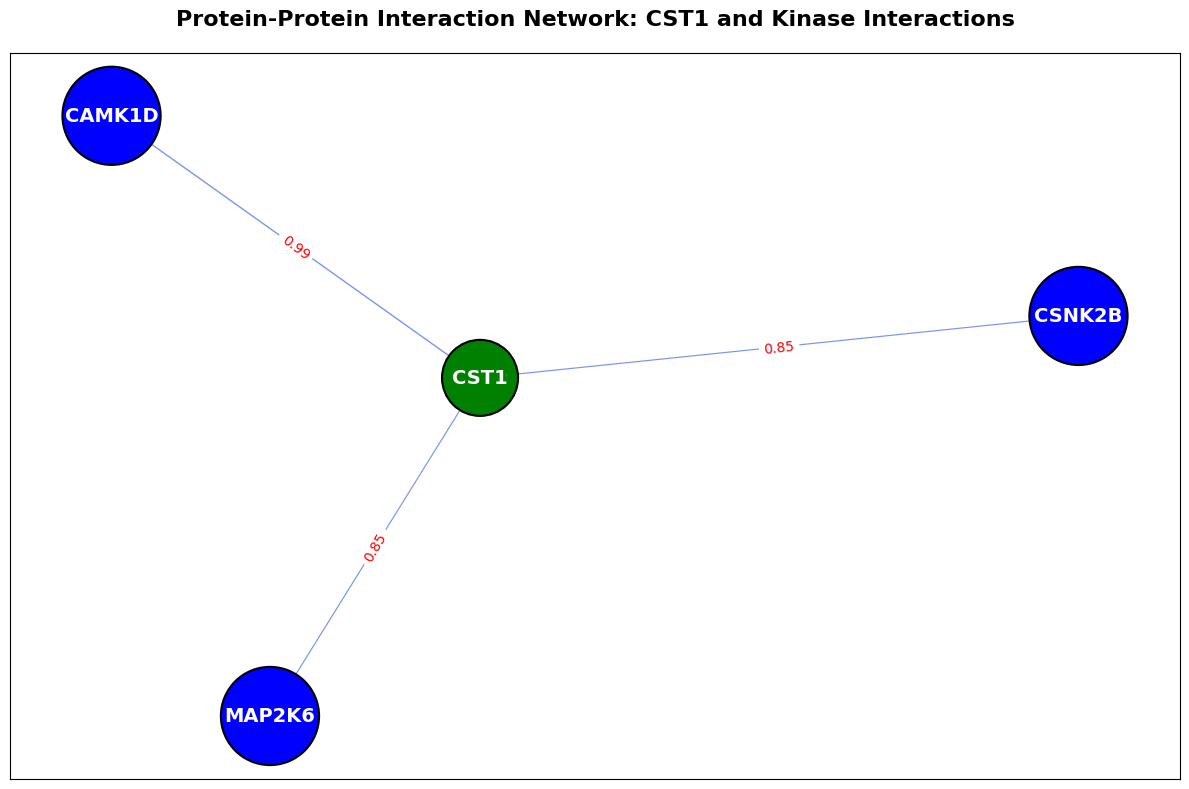

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个空的有向图
G = nx.Graph()

# 添加 CST1 和激酶节点
G.add_node("CST1", color='green', size=3000)

# 添加相关的激酶和边的权重（假设是物理交互评分）
kinases = {"CSNK2B": 0.854599521, "MAP2K6": 0.854599521, "CAMK1D": 0.990760901}

for kinase, score in kinases.items():
    G.add_node(kinase, color='blue', size=5000)
    G.add_edge("CST1", kinase, weight=score)

# 获取节点颜色和大小
colors = [G.nodes[n]['color'] for n in G.nodes]
sizes = [G.nodes[n]['size'] for n in G.nodes]
weights = nx.get_edge_attributes(G, 'weight').values()

# 重新设计图表，确保科学性和严谨性
plt.figure(figsize=(12,8))

# 设置布局
pos = nx.spring_layout(G, seed=42)

# 设置图节点和边的颜色和大小，增加美观性
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, edgecolors='black', linewidths=1.5)
nx.draw_networkx_labels(G, pos, font_size=14, font_color="white", font_weight="bold", verticalalignment='center', horizontalalignment='center')
nx.draw_networkx_edges(G, pos, width=list(weights), edge_color='royalblue', alpha=0.7)

# 添加权重标签以展示物理交互评分
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d:.2f}" for (u, v), d in edge_labels.items()}, font_color='red')

# 设置标题，使用更大字体以适应Q1标准
plt.title("Protein-Protein Interaction Network: CST1 and Kinase Interactions", fontsize=16, fontweight="bold", pad=20)

# 调整边距
plt.tight_layout()

# 显示图表
plt.show()
